Lambda School Data Science

*Unit 2, Sprint 1, Module 2*

---

# Regression 2

## Assignment

You'll continue to **predict how much it costs to rent an apartment in NYC,** using the dataset from renthop.com.

- [ ] Do train/test split. Use data from April & May 2016 to train. Use data from June 2016 to test.
- [ ] Engineer at least two new features. (See below for explanation & ideas.)
- [ ] Fit a linear regression model with at least two features.
- [ ] Get the model's coefficients and intercept.
- [ ] Get regression metrics RMSE, MAE, and $R^2$, for both the train and test data.
- [ ] What's the best test MAE you can get? Share your score and features used with your cohort on Slack!
- [ ] As always, commit your notebook to your fork of the GitHub repo.


#### [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)

> "Some machine learning projects succeed and some fail. What makes the difference? Easily the most important factor is the features used." — Pedro Domingos, ["A Few Useful Things to Know about Machine Learning"](https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf)

> "Coming up with features is difficult, time-consuming, requires expert knowledge. 'Applied machine learning' is basically feature engineering." — Andrew Ng, [Machine Learning and AI via Brain simulations](https://forum.stanford.edu/events/2011/2011slides/plenary/2011plenaryNg.pdf) 

> Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work. 

#### Feature Ideas
- Does the apartment have a description?
- How long is the description?
- How many total perks does each apartment have?
- Are cats _or_ dogs allowed?
- Are cats _and_ dogs allowed?
- Total number of rooms (beds + baths)
- Ratio of beds to baths
- What's the neighborhood, based on address or latitude & longitude?

## Stretch Goals
- [ ] If you want more math, skim [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf),  Chapter 3.1, Simple Linear Regression, & Chapter 3.2, Multiple Linear Regression
- [ ] If you want more introduction, watch [Brandon Foltz, Statistics 101: Simple Linear Regression](https://www.youtube.com/watch?v=ZkjP5RJLQF4)
(20 minutes, over 1 million views)
- [ ] Add your own stretch goal(s) !

In [145]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [146]:
import numpy as np
import pandas as pd

# Read New York City apartment rental listing data
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv')
assert df.shape == (49352, 34)

# Remove the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= np.percentile(df['price'], 0.5)) & 
        (df['price'] <= np.percentile(df['price'], 99.5)) & 
        (df['latitude'] >= np.percentile(df['latitude'], 0.05)) & 
        (df['latitude'] < np.percentile(df['latitude'], 99.95)) &
        (df['longitude'] >= np.percentile(df['longitude'], 0.05)) & 
        (df['longitude'] <= np.percentile(df['longitude'], 99.95))]

In [147]:
pd.set_option('display.max_columns', None)

In [148]:
df

bathrooms  bedrooms              created  \
0            1.5         3  2016-06-24 07:54:24   
1            1.0         2  2016-06-12 12:19:27   
2            1.0         1  2016-04-17 03:26:41   
3            1.0         1  2016-04-18 02:22:02   
4            1.0         4  2016-04-28 01:32:41   
...          ...       ...                  ...   
49347        1.0         2  2016-06-02 05:41:05   
49348        1.0         1  2016-04-04 18:22:34   
49349        1.0         1  2016-04-16 02:13:40   
49350        1.0         0  2016-04-08 02:13:33   
49351        1.0         2  2016-04-12 02:48:07   

                                             description      display_address  \
0      A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...  Metropolitan Avenue   
1                                                             Columbus Avenue   
2      Top Top West Village location, beautiful Pre-w...          W 13 Street   
3      Building Amenities - Garage - Garden - fitness...     East 49th Street   
4      Beautifully renovated 3 bedroom flex 4 bedroom...    West 143rd Street   
...                                                  ...                  ...   
49347  30TH/3RD, MASSIVE CONV 2BR IN LUXURY FULL SERV...              E 30 St   
49348  HIGH END condo finishes, swimming pool, and ki...            Rector Pl   
49349  Large Renovated One Bedroom Apartment with Sta...     West 45th Street   
49350  Stylishly sleek studio apartment with unsurpas...          Wall Street   
49351  Look no further!!!  This giant 2 bedroom apart...    Park Terrace East   

       latitude  longitude  price           street_address interest_level  \
0       40.7145   -73.9425   3000  792 Metropolitan Avenue         medium   
1       40.7947   -73.9667   5465      808 Columbus Avenue            low   
2       40.7388   -74.0018   2850          241 W 13 Street           high   
3       40.7539   -73.9677   3275     333 East 49th Street            low   
4       40.8241   -73.9493   3350    500 West 143rd Street            low   
...         ...        ...    ...                      ...            ...   
49347   40.7426   -73.9790   3200              230 E 30 St         medium   
49348   40.7102   -74.0163   3950         225 Rector Place            low   
49349   40.7601   -73.9900   2595     341 West 45th Street            low   
49350   40.7066   -74.0101   3350           37 Wall Street            low   
49351   40.8699   -73.9172   2200     30 Park Terrace East            low   

       elevator  cats_allowed  hardwood_floors  dogs_allowed  doorman  \
0             0             0                0             0        0   
1             1             1                0             1        1   
2             0             0                1             0        0   
3             0             0                1             0        0   
4             0             0                0             0        0   
...         ...           ...              ...           ...      ...   
49347         1             0                1             0        0   
49348         1             1                0             1        1   
49349         1             1                0             1        1   
49350         1             1                0             1        1   
49351         0             0                1             0        0   

       dishwasher  no_fee  laundry_in_building  fitness_center  pre-war  \
0               0       0                    0               0        0   
1               0       0                    0               1        0   
2               1       0                    1               0        0   
3               0       1                    0               0        0   
4               0       0                    0               0        1   
...           ...     ...                  ...             ...      ...   
49347           1       1                    0               0        0   
49348           0  

In [149]:
# Engineer at least two new features.

In [ ]:
# I need to revisit these so I can know how feature engineer better

In [150]:
# roomratio = df['bedrooms'] / df['bathrooms']

In [151]:
# df['roomratio']=roomratio

In [152]:
# Produces "MissingDataError: exog contains inf or nans" at Baseline Scatter

In [153]:
# 2. descriptionlength = df['description'].str.len()

In [154]:
# descriptionlength

In [155]:
# df['descriptionlength']=descriptionlength
# Error "A value is trying to be set on a copy of a slice from a DataFrame.
# Try using .loc[row_indexer,col_indexer] = value instead"

In [156]:
# 3. Does the apartment have a description?

In [157]:
# df['description'].isnull().sum()
# Why did this produce '0', but below it produces 1425? Also skipping engineering this feature

In [158]:
# 4. Are cats and dogs allowed?

In [159]:
# df['dogs_cats_allowed'] = np.where(df['cats_allowed']==df['dogs_allowed'], 1, 0)
# Not quite

In [160]:
# df['dogs_cats_allowed']

In [161]:
# Total amenities

In [162]:
df['total_amenities'] = df['elevator'] + df['cats_allowed'] + df['hardwood_floors'] + df['dogs_allowed']
+ df['doorman'] + df['doorman'] + df['dishwasher'] + df['no_fee'] + df['laundry_in_building'] + df['fitness_center']
+ df['pre-war'] + df['laundry_in_unit'] + df['roof_deck'] + df['outdoor_space'] + df['dining_room'] + df['high_speed_internet']
+ df['balcony'] + df['swimming_pool'] + df['new_construction'] + df['terrace'] + df['exclusive'] + df['loft']
+ df['garden_patio'] + df['wheelchair_access'] + df['common_outdoor_space']

0        0
1        0
2        0
3        0
4        0
        ..
49347    0
49348    1
49349    0
49350    0
49351    0
Length: 48817, dtype: int64

In [163]:
# Total number of rooms

In [164]:
totalrooms = df['bedrooms'] + df['bathrooms']

In [165]:
df['totalrooms']=totalrooms

In [167]:
df['neighborhood']=df['display_address']

In [168]:
df['neighborhood']

0        Metropolitan Avenue
1            Columbus Avenue
2                W 13 Street
3           East 49th Street
4          West 143rd Street
                ...         
49347                E 30 St
49348              Rector Pl
49349       West 45th Street
49350            Wall Street
49351      Park Terrace East
Name: neighborhood, Length: 48817, dtype: object

In [169]:
df=df.rename_axis('property', axis='columns')

In [170]:
df

property  bathrooms  bedrooms              created  \
0               1.5         3  2016-06-24 07:54:24   
1               1.0         2  2016-06-12 12:19:27   
2               1.0         1  2016-04-17 03:26:41   
3               1.0         1  2016-04-18 02:22:02   
4               1.0         4  2016-04-28 01:32:41   
...             ...       ...                  ...   
49347           1.0         2  2016-06-02 05:41:05   
49348           1.0         1  2016-04-04 18:22:34   
49349           1.0         1  2016-04-16 02:13:40   
49350           1.0         0  2016-04-08 02:13:33   
49351           1.0         2  2016-04-12 02:48:07   

property                                        description  \
0         A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...   
1                                                             
2         Top Top West Village location, beautiful Pre-w...   
3         Building Amenities - Garage - Garden - fitness...   
4         Beautifully renovated 3 bedroom flex 4 bedroom...   
...                                                     ...   
49347     30TH/3RD, MASSIVE CONV 2BR IN LUXURY FULL SERV...   
49348     HIGH END condo finishes, swimming pool, and ki...   
49349     Large Renovated One Bedroom Apartment with Sta...   
49350     Stylishly sleek studio apartment with unsurpas...   
49351     Look no further!!!  This giant 2 bedroom apart...   

property      display_address  latitude  longitude  price  \
0         Metropolitan Avenue   40.7145   -73.9425   3000   
1             Columbus Avenue   40.7947   -73.9667   5465   
2                 W 13 Street   40.7388   -74.0018   2850   
3            East 49th Street   40.7539   -73.9677   3275   
4           West 143rd Street   40.8241   -73.9493   3350   
...                       ...       ...        ...    ...   
49347                 E 30 St   40.7426   -73.9790   3200   
49348               Rector Pl   40.7102   -74.0163   3950   
49349        West 45th Street   40.7601   -73.9900   2595   
49350             Wall Street   40.7066   -74.0101   3350   
49351       Park Terrace East   40.8699   -73.9172   2200   

property           street_address interest_level  elevator  cats_allowed  \
0         792 Metropolitan Avenue         medium         0             0   
1             808 Columbus Avenue            low         1             1   
2                 241 W 13 Street           high         0             0   
3            333 East 49th Street            low         0             0   
4           500 West 143rd Street            low         0             0   
...                           ...            ...       ...           ...   
49347                 230 E 30 St         medium         1             0   
49348            225 Rector Place            low         1             1   
49349        341 West 45th Street            low         1             1   
49350              37 Wall Street            low         1             1   
49351        30 Park Terrace East            low         0             0   

property  hardwood_floors  dogs_allowed  doorman  dishwasher  no_fee  \
0                       0             0        0           0       0   
1                       0             1        1           0       0   
2                       1             0        0           1       0   
3                       1             0        0           0       1   
4                       0             0        0           0       0   
...                   ...           ...      ...         ...     ...   
49347                   1             0        0           1       1   
49348                   0             1        1           0       0   
49349                   0             1        1           0       0   
49350                   0             1        1           0       0   
49351                   1             0        0           0       0   

property  laundry_in_building  fitness_center  pre-war  laundry_in_unit  \
0       

In [171]:
df.isnull().sum()

property
bathrooms                  0
bedrooms                   0
created                    0
description             1425
display_address          133
latitude                   0
longitude                  0
price                      0
street_address            10
interest_level             0
elevator                   0
cats_allowed               0
hardwood_floors            0
dogs_allowed               0
doorman                    0
dishwasher                 0
no_fee                     0
laundry_in_building        0
fitness_center             0
pre-war                    0
laundry_in_unit            0
roof_deck                  0
outdoor_space              0
dining_room                0
high_speed_internet        0
balcony                    0
swimming_pool              0
new_construction           0
terrace                    0
exclusive                  0
loft                       0
garden_patio               0
wheelchair_access          0
common_outdoor_space       0
total

In [172]:
df = df.dropna()

In [173]:
# df=df.replace([np.inf, -np.inf], np.nan)

In [174]:
# df=df.replace([np.inf, -np.inf], np.nan).dropna

In [175]:
# df=df.dropna(how='all', inplace=True)

In [176]:
# df=df.fillna(method='ffill')

In [177]:
df.isnull().sum()

property
bathrooms               0
bedrooms                0
created                 0
description             0
display_address         0
latitude                0
longitude               0
price                   0
street_address          0
interest_level          0
elevator                0
cats_allowed            0
hardwood_floors         0
dogs_allowed            0
doorman                 0
dishwasher              0
no_fee                  0
laundry_in_building     0
fitness_center          0
pre-war                 0
laundry_in_unit         0
roof_deck               0
outdoor_space           0
dining_room             0
high_speed_internet     0
balcony                 0
swimming_pool           0
new_construction        0
terrace                 0
exclusive               0
loft                    0
garden_patio            0
wheelchair_access       0
common_outdoor_space    0
total_amenities         0
totalrooms              0
neighborhood            0
dtype: int64

In [178]:
# df

In [179]:
#  Do train/test split. Use data from April & May 2016 to train. Use data from June 2016 to test.

In [180]:
train = df[(df['created'] > '2016-04-01 00:00:00') & (df['created'] <= '2016-05-31 23:59:59')]

In [181]:
test = df[(df['created'] > '2016-06-01 00:00:00') & (df['created'] <= '2016-06-31 23:59:59')]

In [182]:
train.shape, test.shape

((30806, 37), (16454, 37))

In [183]:
# Fit a linear regression model with at least two features. (Begin with baseline, 0 features)

In [184]:
# What was the average price, from April & May 2016?
train['price'].mean()

3573.2410569369604

In [185]:
# Arrange y target vectors
target = 'price'
y_train = train[target]
y_test = test[target]

In [186]:
y_test

0        3000
1        5465
11       1675
14       3050
24       7400
         ... 
49305    2295
49310    3995
49320    2727
49332    4850
49347    3200
Name: price, Length: 16454, dtype: int64

In [187]:
# Get mean baseline
print('Mean Baseline (using 0 features)')
guess = y_train.mean()
guess

Mean Baseline (using 0 features)


3573.2410569369604

In [188]:
y_train

2        2850
3        3275
4        3350
5        7995
6        3600
         ... 
49346    4500
49348    3950
49349    2595
49350    3350
49351    2200
Name: price, Length: 30806, dtype: int64

In [189]:
# Train Error
from sklearn.metrics import mean_absolute_error
y_pred = [guess] * len(y_train)
mae = mean_absolute_error(y_train, y_pred)
print(f'Train Error (April - June 2016 NYC Rent): {mae:.2f} price')

Train Error (April - June 2016 NYC Rent): 1202.40 price


In [190]:
# Test Error
y_pred = [guess] * len(y_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Test Error (April - June 2016 NYC Rent): {mae:.2f} price')

Test Error (April - June 2016 NYC Rent): 1200.82 price


In [191]:
(y_test - y_pred).abs().mean()

1200.8218488967066

In [192]:
# Simple Regression (1 feature)

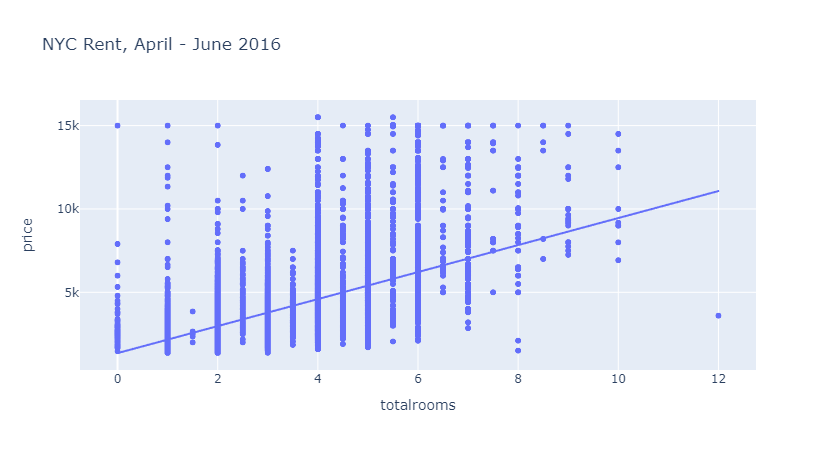

In [193]:
import pandas as pd
import plotly.express as px

px.scatter(
    train,
    x = 'totalrooms',
    y = 'price',
    text = 'bedrooms',
    title = 'NYC Rent, April - June 2016',
    trendline = 'ols',
)

In [194]:
# 1. Import the appropriate estimator class from Scikit-Learn
from sklearn.linear_model import LinearRegression

In [195]:
# 2. Instantiate this class
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [196]:
# 3. Arrange X features matrices (already did y target vectors)
features = ['totalrooms']
X_train = train[features]
X_test = test[features]
print(f'Linear Regression, dependent on: {features}')

Linear Regression, dependent on: ['totalrooms']


In [197]:
# 4. Fit the model
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
mae = mean_absolute_error(y_train, y_pred_train)
print(f'Train Error: {mae:.2f} percentage points')

Train Error: 889.91 percentage points


In [198]:
# 5. Apply the model to the new data
y_pred = model.predict(X_test)
mae = mean_absolute_error (y_test, y_pred)
print(f'Test Error: {mae:.2f} percentage points')

Test Error: 908.52 percentage points


In [199]:
# The Test Error is worese than the Train Error

In [200]:
# Multiple Regression (2 features)

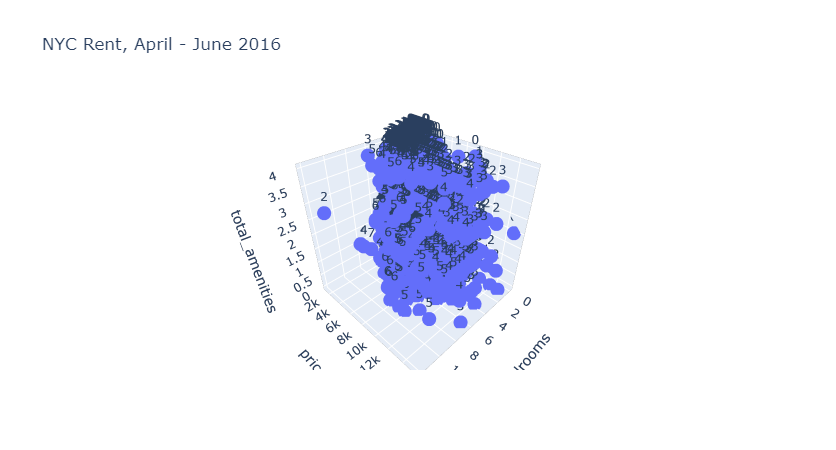

In [201]:
px.scatter_3d(
    train,
    x='totalrooms',
    y='price',
    z='total_amenities',
    text='bedrooms',
    title='NYC Rent, April - June 2016',
)

In [202]:
# Re-arrange X features matrices
features = ['totalrooms',
           'total_amenities']
print(f'Linear Regression dependent on: {features}')

X_train = train[features]
X_train

Linear Regression dependent on: ['totalrooms', 'total_amenities']


property  totalrooms  total_amenities
2                2.0                1
3                2.0                1
4                5.0                0
5                6.0                0
6                3.0                2
...              ...              ...
49346            2.0                2
49348            2.0                3
49349            2.0                3
49350            1.0                3
49351            3.0                1

[30806 rows x 2 columns]

In [203]:
X_test = test[features]
X_test

property  totalrooms  total_amenities
0                4.5                0
1                3.0                3
11               2.0                0
14               2.0                2
24               6.0                4
...              ...              ...
49305            3.0                1
49310            4.0                2
49320            2.0                2
49332            3.0                2
49347            3.0                2

[16454 rows x 2 columns]

In [204]:
# Fit the model
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [205]:
# Apply the model to the new data
y_pred_train = model.predict(X_train)
mean_absolute_error(y_pred_train, y_train)

866.3841764820042

In [206]:
y_pred = model.predict(X_test)
mean_absolute_error(y_pred, y_test)

886.410160466908

In [207]:
# How does the error compare to the prior model?
# This error is lower than the previous model by approximately 33%

In [208]:
import itertools
import numpy as np
import plotly.express as px
import plotly.graph_objs as go
from sklearn.linear_model import LinearRegression

def regression_3d(df, x, y, z, num=100, **kwargs):
    """
    Visualize linear regression in 3D: 2 features + 1 target
    
    df : Pandas DataFrame
    x : string, feature 1 column in df
    y : string, feature 2 column in df
    z : string, target column in df
    num : integer, number of quantiles for each feature
    """
    
    # Plot data
    fig = px.scatter_3d(df, x, y, z, **kwargs)
    
    # Fit Linear Regression
    features = [x, y]
    target = z
    model = LinearRegression()
    model.fit(df[features], df[target])    
    
    # Define grid of coordinates in the feature space
    xmin, xmax = df[x].min(), df[x].max()
    ymin, ymax = df[y].min(), df[y].max()
    xcoords = np.linspace(xmin, xmax, num)
    ycoords = np.linspace(ymin, ymax, num)
    coords = list(itertools.product(xcoords, ycoords))
    
    # Make predictions for the grid
    predictions = model.predict(coords)
    Z = predictions.reshape(num, num).T
    
    # Plot predictions as a 3D surface (plane)
    fig.add_trace(go.Surface(x=xcoords, y=ycoords, z=Z))
    
    return fig

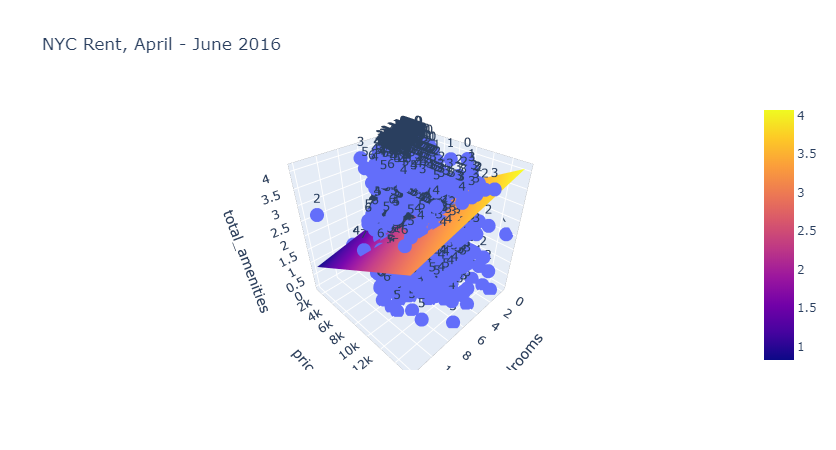

In [209]:
regression_3d(
    train,
    x='totalrooms',
    y='price',
    z='total_amenities',
    text='bedrooms',
    title='NYC Rent, April - June 2016',
)

In [210]:
 # Get the model's coefficients and intercept.

In [211]:
model.intercept_, model.coef_

(995.7199417703368, array([800.5828275, 197.8291274]))

In [212]:
beta0 = model.intercept_
beta1, beta2 = model.coef_
print(f'y = {beta0:.2f} + {beta1:.2f}*x1 + {beta2:.2f}*x2')

y = 995.72 + 800.58*x1 + 197.83*x2


In [213]:
# This is easier to read
print('Intercept', model.intercept_)
coefficients = pd.Series(model.coef_, features)
print(coefficients.to_string())

Intercept 995.7199417703368
totalrooms         800.582828
total_amenities    197.829127


In [214]:
model.predict([[0,0]])

array([995.71994177])

In [215]:
# Get regression metrics RMSE, MAE, and  𝑅2 , for both the train and test data.

In [216]:
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def squared_errors(df, feature, target, m, b):
    """
    Visualize linear regression, with squared errors,
    in 2D: 1 feature + 1 target.
    
    Use the m & b parameters to "fit the model" manually.
    
    df : Pandas DataFrame
    feature : string, feature column in df
    target : string, target column in df
    m : numeric, slope for linear equation
    b : numeric, intercept for linear requation
    """
    
    # Plot data
    fig = plt.figure(figsize=(7,7))
    ax = plt.axes()
    df.plot.scatter(feature, target, ax=ax)
    
    # Make predictions
    x = df[feature]
    y = df[target]
    y_pred = m*x + b
    
    # Plot predictions
    ax.plot(x, y_pred)
    
    # Plot squared errors
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    scale = (xmax-xmin)/(ymax-ymin)
    for x, y1, y2 in zip(x, y, y_pred):
        bottom_left = (x, min(y1, y2))
        height = abs(y1 - y2)
        width = height * scale
        ax.add_patch(Rectangle(xy=bottom_left, width=width, height=height, alpha=0.1))
    
    # Print regression metrics
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print('Mean Squared Error:', mse)
    print('Root Mean Squared Error:', rmse)
    print('Mean Absolute Error:', mae)
    print('R^2:', r2)

Mean Squared Error: 3112260.8713858067
Root Mean Squared Error: 1764.1601036713778
Mean Absolute Error: 1202.398300781848
R^2: 0.0


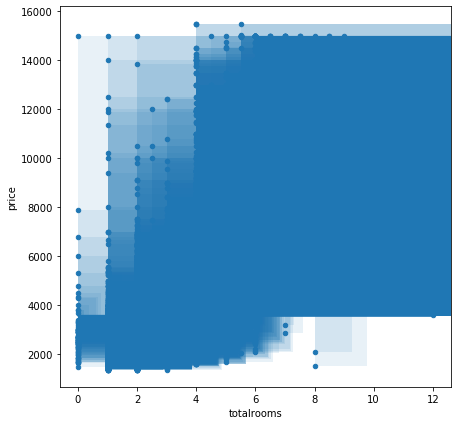

In [217]:
# Mean baseline
feature = 'totalrooms'
squared_errors(train, feature, target, m=0, b=y_train.mean())

Mean Squared Error: 15486028.887408298
Root Mean Squared Error: 3935.229203922981
Mean Absolute Error: 3519.0178861260792
R^2: -3.9758132519632845


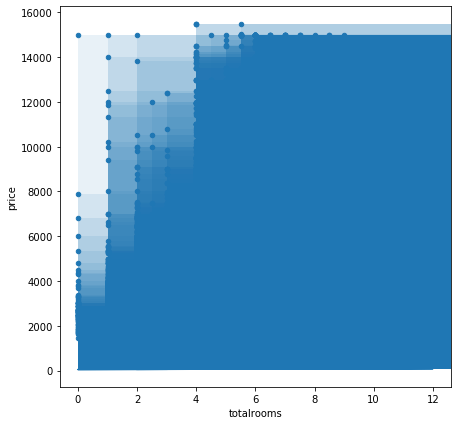

In [218]:
squared_errors(train, feature, target, m=3, b=46)

In [219]:
# What's the best test MAE you can get? Share your score and features used with your cohort on Slack!

In [ ]:
# See MAE above, my Jupyter Lab keeps freezing. Will try to improve when studying this weekend. Twas fun sharing.